<a href="https://colab.research.google.com/github/milieureka/derivative-pricing/blob/main/Derivative_Pricing_binomial_trinomial_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Parameters
S0 = 100    # Initial stock price
r = 0.05    # Risk-free rate (5%)
sigma = 0.20  # Volatility (20%)
T = 0.25    # Time to maturity (3 months)
N = 1000     # Number of steps

# Strike prices for different moneyness levels
strike_prices = [0.9 * S0, 0.95 * S0, S0, 1.05 * S0, 1.1 * S0]

# 5. Price an ATM European call and put using a binomial tree

Steps     Call Price     Put Price      
-----------------------------------
50        4.5951         3.3529         
100       4.6050         3.3628         
200       4.6100         3.3678         
400       4.6125         3.3703         
800       4.6137         3.3715         
1000      4.6140         3.3718         


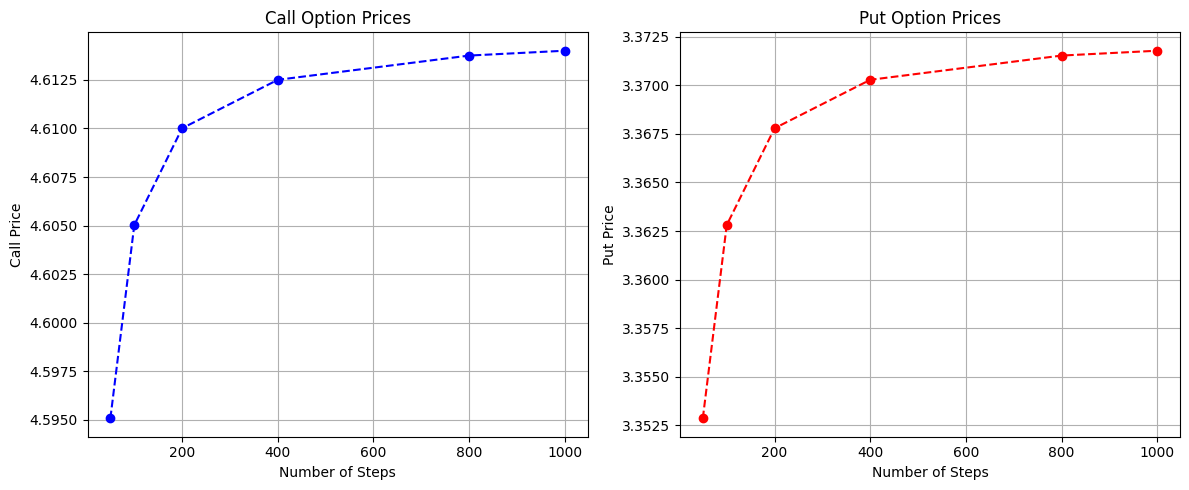

In [ ]:
import numpy as np
from math import exp, sqrt
import matplotlib.pyplot as plt

def binomial_euro_pricer(S0, K, r, sigma, T, N, option_type='call'):
    dt = T/N
    u = exp(sigma * sqrt(dt))
    d = 1/u
    p = (exp(r*dt) - d)/(u - d)
    stock = np.zeros((N+1, N+1))
    stock[0,0] = S0
    #Simulate stock price
    for i in range(1, N+1):
        for j in range(i+1):
            stock[j,i] = S0 * (u**(i-j)) * (d**j)

    option = np.zeros((N+1, N+1))
#Calculate option payoff
    for j in range(N+1):
        if option_type.lower() == 'call':
            option[j,N] = max(0, stock[j,N] - K)
        else:
            option[j,N] = max(0, K - stock[j,N])
#discounting to the current price
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            option[j,i] = exp(-r*dt) * (p*option[j,i+1] + (1-p)*option[j+1,i+1])

    return option[0,0]

# Parameters
S0 = 100  # Initial stock price
K = 100
r = 0.05
sigma = 0.20
T = 0.25
steps = [50, 100, 200, 400, 800,1000]

call_prices_eu = []
put_prices_eu = []

for N in steps:
    call_price = binomial_euro_pricer(S0, K, r, sigma, T, N, 'call')
    put_price = binomial_euro_pricer(S0, K, r, sigma, T, N, 'put')
    call_prices_eu.append(call_price)
    put_prices_eu.append(put_price)

print(f"{'Steps':<10}{'Call Price':<15}{'Put Price':<15}")
print("-" * 35)
for i, N in enumerate(steps):
    print(f"{N:<10}{call_prices_eu[i]:<15.4f}{put_prices_eu[i]:<15.4f}")

#Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(steps, call_prices_eu, marker='o', color='blue', linestyle='--')
ax1.set_title('Call Option Prices')
ax1.set_xlabel('Number of Steps')
ax1.set_ylabel('Call Price')
ax1.grid(True)

ax2.plot(steps, put_prices_eu, marker='o', color='red', linestyle='--')
ax2.set_title('Put Option Prices')
ax2.set_xlabel('Number of Steps')
ax2.set_ylabel('Put Price')
ax2.grid(True)

plt.tight_layout()
plt.show()

# 6. Compute the Greek Delta European


In [ ]:
import numpy as np

def european_option(S_ini, K, T, r, N, sigma, opttype):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u - d)
    C = np.zeros([N + 1, N + 1])
    S = np.zeros([N + 1, N + 1])
    Delta = np.zeros([N, N])

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])

    return C[0, 0], C, S, Delta

S0 = 100
K = 100
r = 0.05
sigma = 0.20
T = 0.25
N = 1000

call_price, C, S, call_delta = european_option(S_ini=S0, K=K, T=T, r=r, N=N, sigma=sigma, opttype='C')
put_price, C, S, put_delta = european_option(S_ini=S0, K=K, T=T, r=r, N=N, sigma=sigma, opttype='P')

print(f"European Call Delta: {call_delta[0,0]}")
print(f"European Put Delta: {put_delta[0,0]}")
print(f"Sum of Deltas: {(call_delta[0,0] + put_delta[0,0])}")

European Call Delta: 0.5694431180485371
European Put Delta: -0.43055688195136677
Sum of Deltas: 0.13888623609717032


#7. Compute the Greek Vega European

In [ ]:
import numpy as np
from math import exp, sqrt

def binomial_euro_pricer(S0, K, r, sigma, T, N, option_type='call'):
    """
    Price European options using the binomial tree model
    Parameters remain the same as before
    """
    dt = T/N
    u = exp(sigma * sqrt(dt))
    d = 1/u
    p = (exp(r*dt) - d)/(u - d)

    stock = np.zeros((N+1, N+1))
    stock[0,0] = S0

    for i in range(1, N+1):
        for j in range(i+1):
            stock[j,i] = S0 * (u**(i-j)) * (d**j)

    option = np.zeros((N+1, N+1))

    for j in range(N+1):
        if option_type.lower() == 'call':
            option[j,N] = max(0, stock[j,N] - K)
        else:
            option[j,N] = max(0, K - stock[j,N])

    for i in range(N-1, -1, -1):
        for j in range(i+1):
            option[j,i] = exp(-r*dt) * (p*option[j,i+1] + (1-p)*option[j+1,i+1])

    return option[0,0]

# Parameters
S0 = 100  # Initial stock price
K = 100   # Strike price (ATM)
r = 0.05  # Risk-free rate (5%)
T = 0.25  # Time to maturity (3 months)
N = 1000  # Number of steps

# Initial volatility
sigma1 = 0.20  # 20%
# New volatility
sigma2 = 0.25  # 25%

# Calculate prices at both volatilities
call_price_sigma1 = binomial_euro_pricer(S0, K, r, sigma1, T, N, 'call')
put_price_sigma1 = binomial_euro_pricer(S0, K, r, sigma1, T, N, 'put')

call_price_sigma2 = binomial_euro_pricer(S0, K, r, sigma2, T, N, 'call')
put_price_sigma2 = binomial_euro_pricer(S0, K, r, sigma2, T, N, 'put')

# Calculate price changes
call_price_change = call_price_sigma2 - call_price_sigma1
put_price_change = put_price_sigma2 - put_price_sigma1

# Calculate percentage changes
call_pct_change = (call_price_change / call_price_sigma1) * 100
put_pct_change = (put_price_change / put_price_sigma1) * 100

# Calculate vega (price change per 1% vol change)
vol_change = 5  # percentage points
call_vega = call_price_change / vol_change
put_vega = put_price_change / vol_change

print(f"Initial Prices (σ = 20%):")
print(f"Call: ${call_price_sigma1:.4f}")
print(f"Put: ${put_price_sigma1:.4f}\n")

print(f"New Prices (σ = 25%):")
print(f"Call: ${call_price_sigma2:.4f}")
print(f"Put: ${put_price_sigma2:.4f}\n")

print(f"Price Changes:")
print(f"Call: +${call_price_change:.4f} ({call_pct_change:.2f}%)")
print(f"Put: +${put_price_change:.4f} ({put_pct_change:.2f}%)\n")

print(f"Vega (price change per 1% vol change):")
print(f"Call Vega: ${call_vega:.4f}")
print(f"Put Vega: ${put_vega:.4f}")

Initial Prices (σ = 20%):
Call: $4.6140
Put: $3.3718

New Prices (σ = 25%):
Call: $5.5972
Put: $4.3549

Price Changes:
Call: +$0.9832 (21.31%)
Put: +$0.9832 (29.16%)

Vega (price change per 1% vol change):
Call Vega: $0.1966
Put Vega: $0.1966


## Team member C

# 8. Price an ATM American call and put using a binomial tree

Call Price
With N =   1, the price is 5.585918
With N = 100, the price is 4.605026
With N = 200, the price is 4.610008
With N = 400, the price is 4.612502
With N = 600, the price is 4.613334
With N = 800, the price is 4.613749
With N = 1000, the price is 4.613999
Put Price
With N =   1, the price is 4.343698
With N = 100, the price is 3.474578
With N = 200, the price is 3.477242
With N = 400, the price is 3.478563
With N = 600, the price is 3.478998
With N = 800, the price is 3.479212
With N = 1000, the price is 3.479342


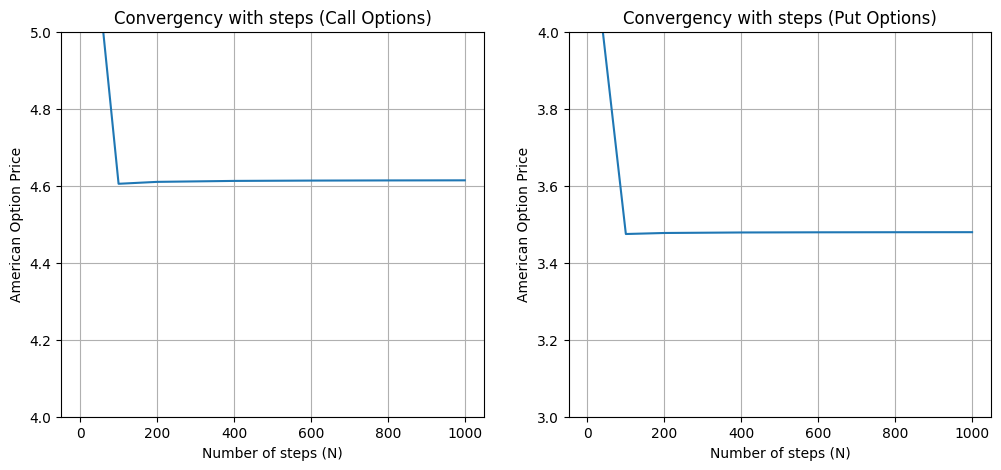

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def american_option_vol(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )

    return C[0, 0], C, S

#Initial Values
Ini_Stk_Price = 100
rate=0.05
sig=0.2
Time=0.25
Nb_of_step=10
Strike = 100

#Price Option
print("Call Price")
Ame_Bi_call_price_array = []
for N in [1, 100, 200, 400, 600, 800, 1000]:
    Ame_Bi_call_price, C, S = american_option_vol(Ini_Stk_Price, Strike, Time, rate, sig, N, "C")
    Ame_Bi_call_price_array.append(Ame_Bi_call_price)
    print("With N = {:3d}, the price is {:f}".format(N, Ame_Bi_call_price))

print("Put Price")
Ame_Bi_put_price_array = []
for N in [1, 100, 200, 400, 600, 800, 1000]:
    Ame_Bi_put_price, P, S = american_option_vol(Ini_Stk_Price, Strike, Time, rate, sig, N, "P")
    Ame_Bi_put_price_array.append(Ame_Bi_put_price)
    print("With N = {:3d}, the price is {:f}".format(N, Ame_Bi_put_price))

#Check for Convergence

N = [1, 100, 200, 400, 600, 800, 1000]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(N, np.array(Ame_Bi_call_price_array))
ax1.set_title("Convergency with steps (Call Options)")
ax1.set_xlabel("Number of steps (N)")
ax1.set_ylabel("American Option Price")
ax1.set_ylim(4, 5)
ax1.grid(True)

ax2.plot(N, np.array(Ame_Bi_put_price_array))
ax2.set_title("Convergency with steps (Put Options)")
ax2.set_xlabel("Number of steps (N)")
ax2.set_ylabel("American Option Price")
ax2.set_ylim(3, 4)
ax2.grid(True)

plt.show()

# 9. Compute the Greek Delta

In [ ]:
def american_option(S_ini, K, T, r, N, sigma, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

Nb_of_step=1000
sig=0.2

In [ ]:
Ame_Bi_call_price, C, S, Ame_Bi_call_delta = american_option(Ini_Stk_Price, Strike, Time, rate, Nb_of_step, sig, "C")
Ame_Bi_call_delta[0,0]

0.5694431180485371

In [ ]:
Ame_Bi_put_price, P, S, Ame_Bi_put_delta = american_option(Ini_Stk_Price, Strike, Time, rate, Nb_of_step, sig, "P")
Ame_Bi_put_delta[0,0]

-0.4494593887496176

### What does delta proxy for?
Delta proxies or presents for the directional sensitivity of an option's price to the underlying asset. The differences between delta and its sign of Call and Put options are explained below.

### Differences and Signs of Delta for American Call and American Put Options
American Call Option: The Delta at the initial time is positive, showing the option’s value generally increases when the underlying asset price increases.
American Call Option Delta values:
- Ranges from 0 to 1
- Reaching to close 1 means reaching to ITM (in the money).
- ATM At-the-money have a Delta near 0.5
- Delta is near 0 when it is Out-of-the-money

American Put Option: The Delta is negative because, showing that the price of the underlying asset increase, the option’s value decreases.
American Put Option Delta values:
- Ranges from -1 to 0
- Deep in-the-money is represented with a Delta closer to -1
- ATM At-the-money have a Delta near -0.5
- Delta is near 0 when it is Out-of-the-money


### Why does it make sense to obtain a positive/negative delta for each option?
As explained above, the Delta values are moved along with the value of underlying asset. In the Call Option, the right to buy the asset, that means when the underlying asset price increase, it is likely to buy the asset, so the value of the buying right (call option) should be increased.Therefore, the delta is positive.
In the oposite to Put option - the right to sell the asset. When the price of underlying asset increases, it is unlikely to sell the asset, so the price of the selling right (put option) should decrease. Therefore, the delta is negative.

# 10. The sensitivity of the option price to the underlying volatility (vega)


A 5% increase in volatility (from 20% to 25%).

In [ ]:
sig=0.25


In [ ]:
Ame_Bi_call_price, C, S, call_delta = american_option(Ini_Stk_Price, Strike, Time, rate, Nb_of_step, sig, "C")
Ame_Bi_call_price

5.597156149180632

In [ ]:
Ame_Bi_put_price, P, S, put_delta = american_option(Ini_Stk_Price, Strike, Time, rate, Nb_of_step, sig, "P")
Ame_Bi_put_price

4.459271685664397

### How do prices change with respect to the change in volatility

With sigma of 20%:
- Call price: 4.613999
- Put price: 3.479342

With sigma of 25%:
- Call price: 5.597156149180632
- Put price: 4.459271685664397

From the above results, the increasing volitality makes both options prices increased.


### Comment on the potential differential impact of this change for call and put options

Volatility is the measure of an impact of a change in a underlying asset's price. It is because an option's price is increasing when the propability of in the money (ITM) increases. Because higher volatility makes the range of price longer, it is more likely the value of underlying assets to reach the Strike price and make ITM.

Reference: https://www.investopedia.com/terms/i/iv.asp

# 11. The European call and put satisfy put-call parity

- **Call Payoff**: This line starts at zero when $S_T \leq K $ and increases linearly as $ S_T $ goes above $ K $, representing $ \max(S_T - K, 0) $.
- **Short Put Payoff**: This line decreases when $ S_T $ falls below $ K $, representing the negative payoff of the put option (since it’s short).
- **Combined Payoff**: The combined payoff (call - put) is a straight line starting from $ -K $ at zero stock price and increasing linearly, representing $ S_T - K $. This line shows the result of holding the underlying stock and a cash equivalent of $ -K $, thus matching the underlying stock's payoff minus the strike price.

This graph visually explains why the combination of a call and a short put at the same strike price replicates the payoff of $ S_T - K $ and why put-call parity holds.

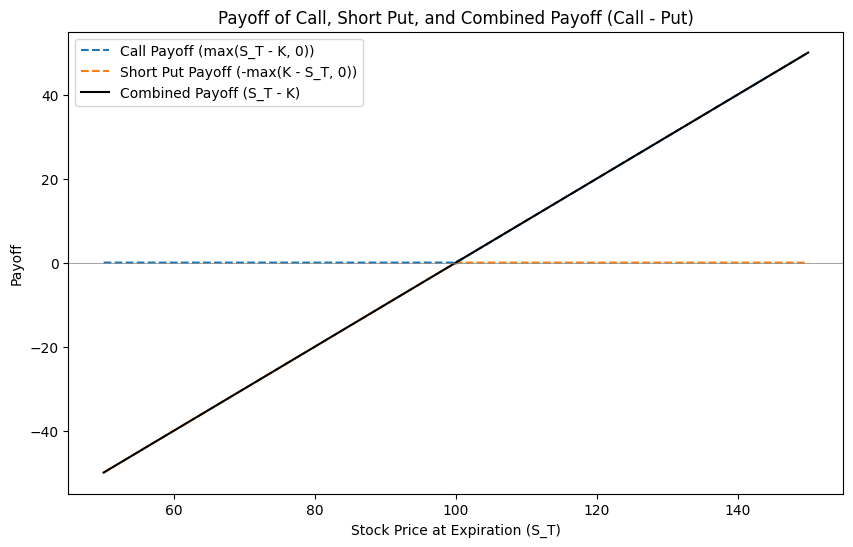

In [ ]:
# Parameters
K = 100  # Strike price
S_range = np.linspace(50, 150, 100)  # Range of possible stock prices at expiration

# Payoffs
call_payoff = np.maximum(S_range - K, 0)
put_payoff = np.maximum(K - S_range, 0)
combined_payoff = call_payoff - put_payoff  # Equivalent to S_T - K

# Plotting the payoff profiles
plt.figure(figsize=(10, 6))
plt.plot(S_range, call_payoff, label="Call Payoff (max(S_T - K, 0))", linestyle='--')
plt.plot(S_range, -put_payoff, label="Short Put Payoff (-max(K - S_T, 0))", linestyle='--')
plt.plot(S_range, combined_payoff, label="Combined Payoff (S_T - K)", color="black")
plt.axhline(0, color="gray", linewidth=0.5)
plt.xlabel("Stock Price at Expiration (S_T)")
plt.ylabel("Payoff")
plt.title("Payoff of Call, Short Put, and Combined Payoff (Call - Put)")
plt.legend();

# 15. European Call options using a trinomial tree

In [ ]:
import numpy as np

class TrinomialEuropeanOption:
    def __init__(self, S0=100, T=0.25, r=0.05, sigma=0.2):
        self.S0 = S0
        self.T = T
        self.r = r
        self.sigma = sigma

    def _calculate_parameters(self, h):
        up = np.exp(self.sigma * np.sqrt(2 * h))
        down = 1/up
        pu = ((np.exp(self.r * h/2) - np.exp(-self.sigma * np.sqrt(h/2))) /
              (np.exp(self.sigma * np.sqrt(h/2)) - np.exp(-self.sigma * np.sqrt(h/2)))) ** 2
        pd = ((-np.exp(self.r * h/2) + np.exp(self.sigma * np.sqrt(h/2))) /
              (np.exp(self.sigma * np.sqrt(h/2)) - np.exp(-self.sigma * np.sqrt(h/2)))) ** 2
        pm = 1 - pu - pd
        return up, down, pu, pd, pm

    def _generate_stock_prices(self, nb_steps, h):
        up, down, _, _, _ = self._calculate_parameters(h)
        vec_u = up * np.ones(nb_steps)
        np.cumprod(vec_u, out=vec_u)
        vec_d = down * np.ones(nb_steps)
        np.cumprod(vec_d, out=vec_d)
        stock_prices = np.concatenate((vec_d[::-1], [1.0], vec_u)) * self.S0
        return stock_prices

    def price(self, K, nb_steps, option_type='C'):
        h = self.T / nb_steps
        discount = np.exp(-self.r * h)
        _, _, pu, pd, pm = self._calculate_parameters(h)
        stock_prices = self._generate_stock_prices(nb_steps, h)
        if option_type == 'C':
            payoff = np.maximum(stock_prices - K, 0)
        else:
            payoff = np.maximum(K - stock_prices, 0)
        for i in range(1, nb_steps + 1):
            stock_prices = self._generate_stock_prices(nb_steps - i, h)
            expectation = np.zeros(stock_prices.size)

            # Calculate expected values
            for j in range(expectation.size):
                expectation[j] = (payoff[j] * pd +
                                payoff[j + 1] * pm +
                                payoff[j + 2] * pu)

            payoff = discount * expectation
        return payoff[0]

def analyze_options():
    S0 = 100
    moneyness = [0.9, 0.95, 1.0, 1.05, 1.1]  # 90%, 95%, ATM, 105%, 110%
    strikes = [S0 * m for m in moneyness]
    nb_steps = 1000
    option = TrinomialEuropeanOption()

    print("\nEuropean Call Option Prices:")
    print("Moneyness | Strike | Price | Description")
    print("-" * 50)
    call_prices_eu_trinomial = []
    call_descriptions = ["Deep ITM", "ITM", "ATM", "OTM", "Deep OTM"]
    for m, K, desc in zip(moneyness, strikes, call_descriptions):
        price = option.price(K, nb_steps, 'C')
        call_prices_eu_trinomial.append(price)
        print(f"{m*100:8.1f}% | {K:6.2f} | {price:.4f} | {desc}")

    return call_prices_eu_trinomial

if __name__ == "__main__":
    call_prices_eu_trinomial = analyze_options()


European Call Option Prices:
Moneyness | Strike | Price | Description
--------------------------------------------------
    90.0% |  90.00 | 11.6702 | Deep ITM
    95.0% |  95.00 | 7.7147 | ITM
   100.0% | 100.00 | 4.6145 | ATM
   105.0% | 105.00 | 2.4777 | OTM
   110.0% | 110.00 | 1.1912 | Deep OTM


As can be seen, increasing Strike value is going with decreasing call price. This is reasonable when the increasing strike price make less likely the asset price over the strike, and less likely that the option is in the money at expiration. If excersied, the call option allows the holder to buy at a relatively lower price compared to the current asset price.

# 16. European Put options using a trinomial tree

In [ ]:
def analyze_options():
    S0 = 100
    moneyness = [0.9, 0.95, 1.0, 1.05, 1.1]
    strikes = [S0 * m for m in moneyness]
    nb_steps = 1000
    option = TrinomialEuropeanOption()
    print("\nEuropean Put Option Prices:")
    print("Moneyness | Strike | Price | Description")
    print("-" * 50)
    put_prices_eu_trinomial = []
    put_descriptions = ["Deep OTM", "OTM", "ATM", "ITM", "Deep ITM"]
    for m, K, desc in zip(moneyness, strikes, put_descriptions):
        price = option.price(K, nb_steps, 'P')
        put_prices_eu_trinomial.append(price)
        print(f"{m*100:8.1f}% | {K:6.2f} | {price:.4f} | {desc}")
    return put_prices_eu_trinomial

if __name__ == "__main__":
    put_prices_eu_trinomial = analyze_options()


European Put Option Prices:
Moneyness | Strike | Price | Description
--------------------------------------------------
    90.0% |  90.00 | 0.5522 | Deep OTM
    95.0% |  95.00 | 1.5346 | OTM
   100.0% | 100.00 | 3.3723 | ATM
   105.0% | 105.00 | 6.1733 | ITM
   110.0% | 110.00 | 9.8248 | Deep ITM


As can be seen, increasing Strike value is going with increasing put price. This is reasonable when the increasing strike price make more likely the asset price over the strike, and more likely that the option is in the money at expiration. If excersied, the put option allows the holder to sell at a relatively high price compared to the current asset price.

#17. American Call options using a trinomial tree

In [ ]:
import numpy as np

def _gen_stock_vec(nb, h, s0=100, sigma=0.2):
    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)

    res = np.concatenate((vec_d[::-1], [1.0], vec_u))
    res *= s0
    return res

def American_price(nb_steps, K, opttype, s0=100, r=0.05, sigma=0.2, T=0.25):
    h = T / nb_steps
    discount = np.exp(-r * h)

    pu = ((np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2)))
          / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))) ** 2
    pd = ((-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2)))
          / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))) ** 2
    pm = 1 - pu - pd
    s = _gen_stock_vec(nb_steps, h, s0, sigma)
    if opttype == "C":
        final_payoff = np.maximum(s - K, 0)
    else:
        final_payoff = np.maximum(K - s, 0)

    nxt_vec_prices = final_payoff
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(nb_steps - i, h, s0, sigma)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu
            continuation_value = discount * tmp
            if opttype == "C":
                exercise_value = max(vec_stock[j] - K, 0)
            else:
                exercise_value = max(K - vec_stock[j], 0)
            expectation[j] = max(continuation_value, exercise_value)
        nxt_vec_prices = expectation

    return nxt_vec_prices[0]
S0 = 100
r = 0.05
sigma = 0.2
T = 0.25
Nb_of_step = 1000
strike_prices = [S0 * m for m in [0.90, 0.95, 1.0, 1.05, 1.10]]
Am_Tri_call_prices_trinomial = []
for K in strike_prices:
    price = American_price(Nb_of_step, K, "C", S0, r, sigma, T)
    Am_Tri_call_prices_trinomial.append(price)
    print(f"American Call Option: Strike = {K}, Price = {price}")


American Call Option: Strike = 90.0, Price = 11.670245485966632
American Call Option: Strike = 95.0, Price = 7.714735505928879
American Call Option: Strike = 100.0, Price = 4.614497978118606
American Call Option: Strike = 105.0, Price = 2.4776753018054336
American Call Option: Strike = 110.00000000000001, Price = 1.1912461198265352


#18. American Put options using a trinomial tree

In [ ]:
Am_Tri_put_prices_trinomial = []
for K in strike_prices:
    price = American_price(Nb_of_step, K, "P", S0, r, sigma, T)
    Am_Tri_put_prices_trinomial.append(price)
    print(f"American Put Option: Strike = {K}, Price = {price}")


American Put Option: Strike = 90.0, Price = 0.5631052751092721
American Put Option: Strike = 95.0, Price = 1.5728381898742083
American Put Option: Strike = 100.0, Price = 3.4795037332972645
American Put Option: Strike = 105.0, Price = 6.423390580723973
American Put Option: Strike = 110.00000000000001, Price = 10.33054771625936


# 19 Graph European call prices and put prices versus stock prices

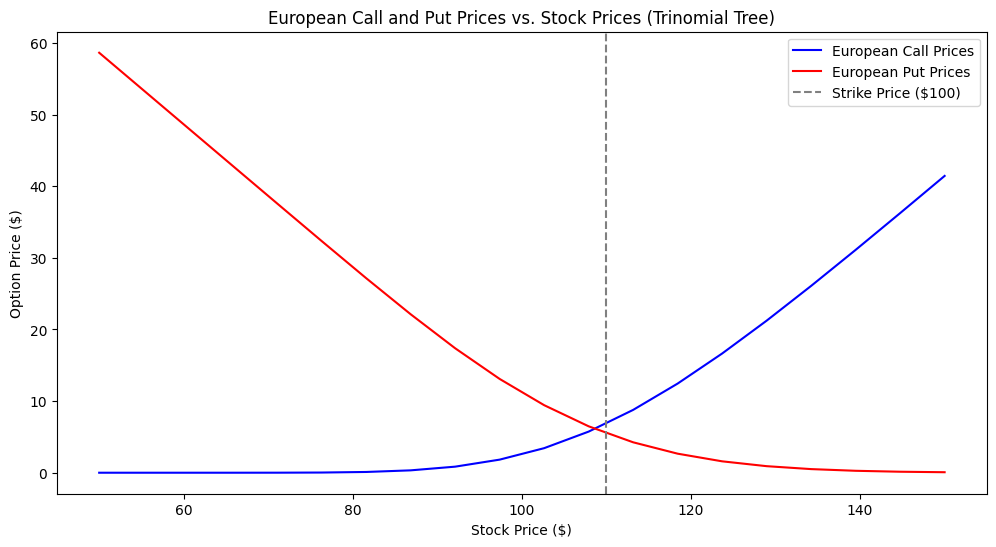

In [ ]:
# Trinomial tree parameters
def trinomial_tree_parameters(N, T, r, sigma):
    dt = T / N  # Time step
    u = np.exp(sigma * np.sqrt(2 * dt))  # Up factor
    d = 1 / u  # Down factor
    m = 1  # Middle factor (no change)
    q_u = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probabilities
    q_m = 1 - q_u - (1 / u - d)  # Middle probability
    q_d = 1 / u - d  # Down probability
    return u, d, m, q_u, q_m, q_d, dt

# Generate stock prices in the trinomial tree
def generate_stock_prices(S0, N, u, d):
    stock_prices = np.zeros((2 * N + 1, N + 1))  # Initialize stock prices
    for i in range(N + 1):
        for j in range(-i, i + 1):
            stock_prices[j + i, i] = S0 * (u ** (i + j)) * (d ** (-j))
    return stock_prices

# Calculate option prices using the trinomial tree
def trinomial_tree_option_price(S0, K, r, sigma, T, N, option_type):
    u, d, m, q_u, q_m, q_d, dt = trinomial_tree_parameters(N, T, r, sigma)
    stock_prices = generate_stock_prices(S0, N, u, d)  # Stock prices tree
    option_values = np.zeros(stock_prices.shape)  # Initialize option values

    # Terminal option values
    if option_type == "call":
        option_values[:, N] = np.maximum(stock_prices[:, N] - K, 0)
    elif option_type == "put":
        option_values[:, N] = np.maximum(K - stock_prices[:, N], 0)

    # Backward induction for option pricing
    for i in range(N - 1, -1, -1):
        for j in range(-i, i + 1):
            option_values[j + i, i] = (q_u * option_values[j + i + 1, i + 1] +
                                        q_m * option_values[j + i, i + 1] +
                                        q_d * option_values[j + i - 1, i + 1]) * np.exp(-r * dt)
    return option_values[0, 0]

# Generate stock prices and calculate option prices
stock_prices_range = np.linspace(50, 150, 20)  # Varying stock prices from 50 to 150

# Calculate call and put prices for varying stock prices
eu_call_prices = []
eu_put_prices = []
for S0 in stock_prices_range:
    eu_call_prices.append(trinomial_tree_option_price(S0, K, r, sigma, T, N, "call"))
    eu_put_prices.append(trinomial_tree_option_price(S0, K, r, sigma, T, N, "put"))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(stock_prices_range, eu_call_prices, label='European Call Prices', color='blue')
plt.plot(stock_prices_range, eu_put_prices, label='European Put Prices', color='red')
plt.title('European Call and Put Prices vs. Stock Prices (Trinomial Tree)')
plt.xlabel('Stock Price ($)')
plt.ylabel('Option Price ($)')
plt.axvline(x=K, color='gray', linestyle='--', label='Strike Price ($100)')
plt.legend();

# 20 Graph American call prices and put prices versus stock prices

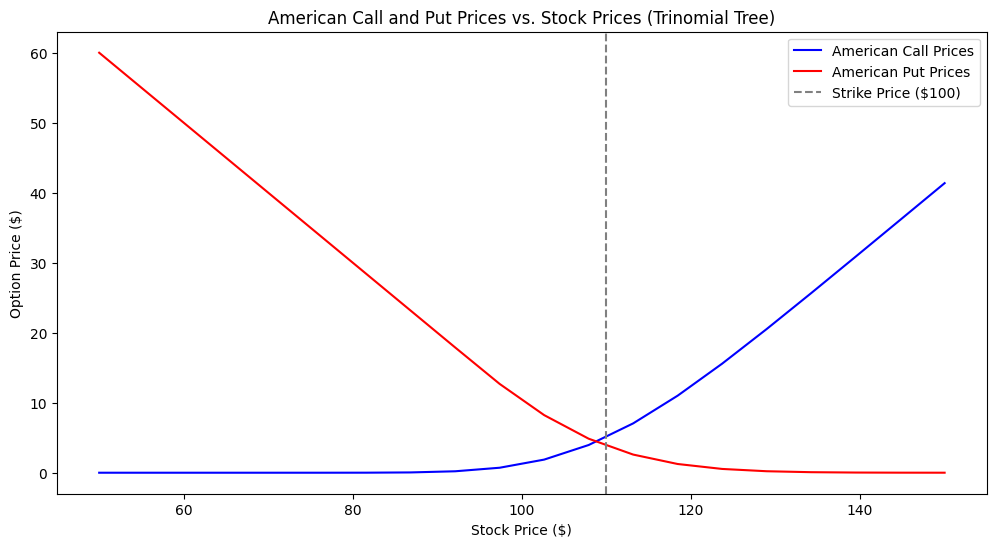

In [ ]:
# Vectorize the option pricing function
vectorized_pricer = np.vectorize(trinomial_american_pricer, excluded=['K', 'r', 'sigma', 'T', 'N', 'option_type'])

# Calculate American call and put prices for varying stock prices
us_call_prices = vectorized_pricer(stock_prices_range, K, r, sigma, T, N, "call")
us_put_prices = vectorized_pricer(stock_prices_range, K, r, sigma, T, N, "put")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(stock_prices_range, us_call_prices, label='American Call Prices', color='blue')
plt.plot(stock_prices_range, us_put_prices, label='American Put Prices', color='red')
plt.title('American Call and Put Prices vs. Stock Prices (Trinomial Tree)')
plt.xlabel('Stock Price ($)')
plt.ylabel('Option Price ($)')
plt.axvline(x=K, color='gray', linestyle='--', label='Strike Price ($100)')
plt.legend();

#21 Graph 3. Graph European and American call prices versus strike.

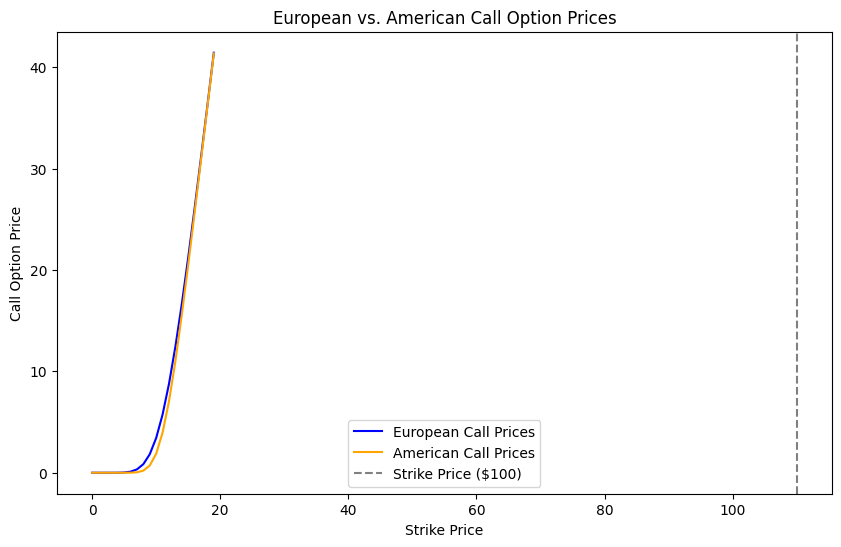

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(eu_call_prices), label='European Call Prices', color='blue')
plt.plot(us_call_prices, label='American Call Prices', color='orange')
plt.title('European vs. American Call Option Prices')
plt.xlabel('Strike Price')
plt.ylabel('Call Option Price')
plt.axvline(x=K, color='gray', linestyle='--', label='Strike Price ($100)')
plt.legend();

#22 Graph 4. Graph European and American put prices versus strike.

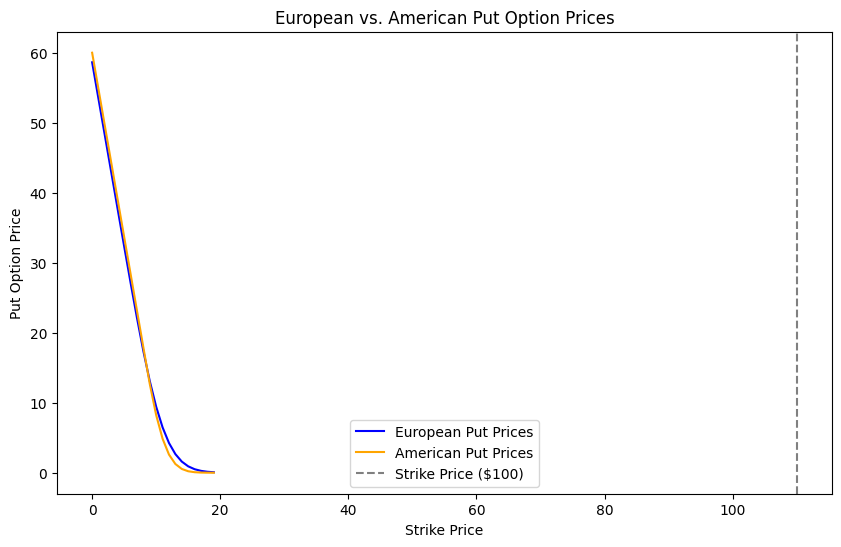

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(eu_put_prices), label='European Put Prices', color='blue')
plt.plot(us_put_prices, label='American Put Prices', color='orange')
plt.title('European vs. American Put Option Prices')
plt.xlabel('Strike Price')
plt.ylabel('Put Option Price')
plt.axvline(x=K, color='gray', linestyle='--', label='Strike Price ($100)')
plt.legend();

### Q.23

In [ ]:
strike_prices = [90.00, 95.00, 100.00, 105.00, 110.00]

# Function to check put-call parity
def check_put_call_parity(S0, r, T, strike_prices, call_prices, put_prices):
    results = []
    for K, C, P in zip(strike_prices, call_prices, put_prices):
        # Calculate K * e^(-rT)
        K_discounted = K * np.exp(-r * T)
        # Left-hand side
        LHS = C + K_discounted
        # Right-hand side
        RHS = P + S0
        parity_holds = np.isclose(LHS, RHS, atol=0.01)  # Allowing a small tolerance
        results.append((K, C, P, LHS, RHS, parity_holds))
    return results
S0=100
r=0.05
T=0.25
eu_results = check_put_call_parity(S0, r, T, strike_prices, call_prices_eu_trinomial, put_prices_eu_trinomial)

for K, C, P, LHS, RHS, parity_holds in eu_results:
    print(f"Strike Price: {K:.2f}, Call Price: {C:.4f}, Put Price: {P:.4f}, LHS: {LHS:.4f}, RHS: {RHS:.4f}, Parity Holds: {parity_holds}")


Strike Price: 90.00, Call Price: 11.6702, Put Price: 0.5522, LHS: 100.5522, RHS: 100.5522, Parity Holds: True
Strike Price: 95.00, Call Price: 7.7147, Put Price: 1.5346, LHS: 101.5346, RHS: 101.5346, Parity Holds: True
Strike Price: 100.00, Call Price: 4.6145, Put Price: 3.3723, LHS: 103.3723, RHS: 103.3723, Parity Holds: True
Strike Price: 105.00, Call Price: 2.4777, Put Price: 6.1733, LHS: 106.1733, RHS: 106.1733, Parity Holds: True
Strike Price: 110.00, Call Price: 1.1912, Put Price: 9.8248, LHS: 109.8248, RHS: 109.8248, Parity Holds: True


# 24. For the 5 strikes that your group member computed in Q17 and Q18, check whether put-call parity holds (within sensible rounding).

In [ ]:
us_results = check_put_call_parity(S0, r, T, strike_prices, Am_Tri_call_prices_trinomial, Am_Tri_put_prices_trinomial)

for K, C, P, LHS, RHS, parity_holds in us_results:
    print(f"Strike Price: {K:.2f}, Call Price: {C:.4f}, Put Price: {P:.4f}, LHS: {LHS:.4f}, RHS: {RHS:.4f}, Parity Holds: {parity_holds}")

Strike Price: 90.00, Call Price: 11.6702, Put Price: 0.5631, LHS: 100.5522, RHS: 100.5631, Parity Holds: True
Strike Price: 95.00, Call Price: 7.7147, Put Price: 1.5728, LHS: 101.5346, RHS: 101.5728, Parity Holds: False
Strike Price: 100.00, Call Price: 4.6145, Put Price: 3.4795, LHS: 103.3723, RHS: 103.4795, Parity Holds: False
Strike Price: 105.00, Call Price: 2.4777, Put Price: 6.4234, LHS: 106.1733, RHS: 106.4234, Parity Holds: False
Strike Price: 110.00, Call Price: 1.1912, Put Price: 10.3305, LHS: 109.8248, RHS: 110.3305, Parity Holds: False


#25. Checker for number 25 Calculation

In [ ]:
import numpy as np

S0 = 180
K = 182
r = 0.02
sigma = 0.25
T = 0.5
n = 3

dt = T / n

u = np.exp(sigma * np.sqrt(dt))
d = 1 / u

p = (np.exp(r * dt) - d) / (u - d)
q = 1 - p

stock_tree = np.zeros((n + 1, n + 1))
stock_tree[0, 0] = S0

for i in range(1, n + 1):
    for j in range(i + 1):
        stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)

option_tree = np.zeros((n + 1, n + 1))

for j in range(n + 1):
    option_tree[j, n] = max(K - stock_tree[j, n], 0)

for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        option_tree[j, i] = np.exp(-r * dt) * (p * option_tree[j, i + 1] + q * option_tree[j + 1, i + 1])

put_option_price = option_tree[0, 0]
print(f"The European put option price is: {put_option_price:.2f}")


The European put option price is: 13.82


#26. Pricing American Put Option 25 Steps

Put Price
With N =   1, the price is 15.915474
With N =   2, the price is 12.270579
With N =   3, the price is 13.978357
With N =   4, the price is 12.713308
With N =   5, the price is 13.555347
With N =   6, the price is 12.839460
With N =   7, the price is 13.366531
With N =   8, the price is 12.890695
With N =   9, the price is 13.266142
With N =  10, the price is 12.919566
With N =  11, the price is 13.200516
With N =  12, the price is 12.935839
With N =  13, the price is 13.155755
With N =  14, the price is 12.946221
With N =  15, the price is 13.122243
With N =  16, the price is 12.952632
With N =  17, the price is 13.096935
With N =  18, the price is 12.957552
With N =  19, the price is 13.076725
With N =  20, the price is 12.960917
With N =  21, the price is 13.060299
With N =  22, the price is 12.963587
With N =  23, the price is 13.046982
With N =  24, the price is 12.965642
With N =  25, the price is 13.035719


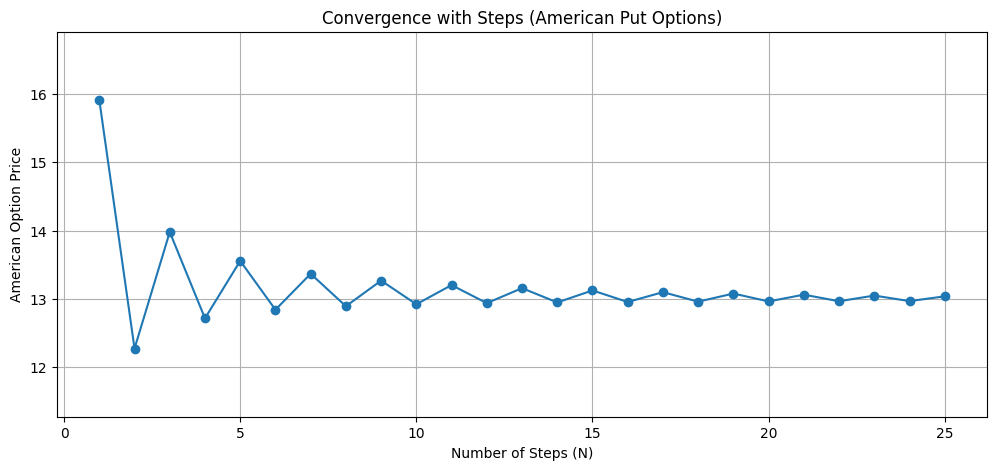

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def american_option_vol(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )

    return C[0, 0], C, S

Ini_Stk_Price = 180
rate=0.02
sig=0.25
Time=0.5
Nb_of_step=1000
Strike = 182
print("Put Price")
Ame_Bi_put_price_array = []
Ame_Bi_put_price_array = []
for N in range(1, 26):
    Ame_Bi_put_price, P, S = american_option_vol(Ini_Stk_Price, Strike, Time, rate, sig, N, "P")
    Ame_Bi_put_price_array.append(Ame_Bi_put_price)
    print("With N = {:3d}, the price is {:f}".format(N, Ame_Bi_put_price))

fig, ax = plt.subplots(figsize=(12, 5))
N_values = np.arange(1, 26)
ax.plot(N_values, Ame_Bi_put_price_array, marker='o')
ax.set_title("Convergence with Steps (American Put Options)")
ax.set_xlabel("Number of Steps (N)")
ax.set_ylabel("American Option Price")
ax.set_ylim(min(Ame_Bi_put_price_array) - 1, max(Ame_Bi_put_price_array) + 1)
ax.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

S0 = 180
K = 182
r = 0.02
sigma = 0.25
T = 0.5
n = 25

dt = T / n
u = np.exp(sigma * np.sqrt(dt))
d = 1 / u
p = (np.exp(r * dt) - d) / (u - d)
q = 1 - p
stock_tree = np.zeros((n + 1, n + 1))
stock_tree[0, 0] = S0

for i in range(1, n + 1):
    for j in range(i + 1):
        stock_tree[j, i] = S0 * (u ** (i - j)) * (d ** j)
option_tree = np.zeros((n + 1, n + 1))
for j in range(n + 1):
    option_tree[j, n] = max(K - stock_tree[j, n], 0)
for i in range(n - 1, -1, -1):
    for j in range(i + 1):
        hold_value = np.exp(-r * dt) * (p * option_tree[j, i + 1] + q * option_tree[j + 1, i + 1])
        exercise_value = max(K - stock_tree[j, i], 0)  # Early exercise value for American option
        option_tree[j, i] = max(hold_value, exercise_value)
american_put_price = option_tree[0, 0]
print(f"The American put option price is: {american_put_price:.2f}")
delta_hedges = np.zeros((n, n))
for i in range(n):
    for j in range(i + 1):
        delta_hedges[j, i] = (option_tree[j, i + 1] - option_tree[j + 1, i + 1]) / (stock_tree[j, i + 1] - stock_tree[j + 1, i + 1])
cash_account = []
path_stock = []
path_delta = []
cash = 0

for i in range(n):
    path_stock.append(stock_tree[i, i])
    path_delta.append(delta_hedges[i, i])
    if i > 0:
        cash += path_delta[-1] * (path_stock[-1] - path_stock[-2])
    cash_account.append(cash)
hedge_data = pd.DataFrame({
    'Stock Price': path_stock,
    'Delta Hedge': path_delta,
    'Cash Account': cash_account
})
print("\nDelta Hedging and Cash Account Evolution:")
print(hedge_data)

The American put option price is: 13.04

Delta Hedging and Cash Account Evolution:
    Stock Price  Delta Hedge  Cash Account
0      180.0000      -0.4756        0.0000
1      173.7472      -0.5608        3.5066
2      167.7117      -0.6479        7.4170
3      161.8857      -0.7331       11.6877
4      156.2622      -0.8124       16.2560
5      150.8340      -0.8822       21.0450
6      145.5944      -0.9400       25.9704
7      140.5368      -0.9844       30.9488
8      135.6549      -1.0000       35.8307
9      130.9426      -1.0000       40.5431
10     126.3939      -1.0000       45.0917
11     122.0033      -1.0000       49.4823
12     117.7652      -1.0000       53.7204
13     113.6743      -1.0000       57.8113
14     109.7255      -1.0000       61.7601
15     105.9139      -1.0000       65.5717
16     102.2347      -1.0000       69.2509
17      98.6833      -1.0000       72.8023
18      95.2553      -1.0000       76.2303
19      91.9464      -1.0000       79.5393
20      88.752

#27. Asian Put Option Price

Calculating Asian Put Option Price Adapting Hull-WHite Method

In [ ]:
import numpy as np

def BTM(strike_type, option_type, S0, K, r, sigma, T, N):
    deltaT = T / N
    u = np.exp(sigma * np.sqrt(deltaT))
    d = 1 / u
    proba = (np.exp(r * deltaT) - d) / (u - d)
    St = [S0]
    At = [S0]
    strike = [K]
    for i in range(N):
        St = [j * u for j in St] + [j * d for j in St]  # Update stock price leaves
        At += At  # Double the size of At to match the new branches
        strike += strike
        for x in range(len(At)):
            At[x] += St[x]
    At = np.array(At) / (N + 1)
    if strike_type == "fixed":
        if option_type == "C":
            payoff = np.maximum(At - np.array(strike), 0)
        else:
            payoff = np.maximum(np.array(strike) - At, 0)
    else:
        if option_type == "C":
            payoff = np.maximum(np.array(St) - At, 0)
        else:
            payoff = np.maximum(At - np.array(St), 0)
    option_price = payoff
    for i in range(N):
        length = len(option_price) // 2
        option_price = proba * option_price[:length] + (1 - proba) * option_price[length:]

    return option_price[0]
# Example usage of the function
asian_option_price = BTM(strike_type="fixed", option_type="P", S0=180, K=180, r=0.02, sigma=0.25, T=0.5, N=25)
print("Asian Option Price:", asian_option_price)


Asian Option Price: 6.877383646602417


Checker: Calculating Asian Option Price Using Monte Carlo (From WQU)

In [ ]:
import numpy as np

def asian_option_mc(S_ini, K, T, r, sigma, N, M):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    Asian = np.zeros(M)  # Asian prices
    S = np.zeros((M, N + 1))  # underlying price
    S[:, 0] = S_ini

    for j in range(M):
        random = np.random.binomial(1, p, N + 1)
        Total = S_ini
        for i in range(1, N + 1):
            if random[i] == 1:
                S[j, i] = S[j, i - 1] * u
            else:
                S[j, i] = S[j, i - 1] * d
            Total += S[j, i]  # Accumulate the total price for averaging

        # Calculate the discounted payoff for the Asian option
        Asian[j] = np.exp(-r * T) * max(Total / (N + 1) - K, 0)

    return S, Asian

# Example usage:
S_ini = 180  # Initial stock price
K = 182      # Strike price
T = 0.5      # Time to maturity (in years)
r = 0.02     # Risk-free rate
sigma = 0.25 # Volatility
N = 25     # Number of steps
M = 10000    # Number of simulations

# Run the simulation
S, Asian = asian_option_mc(S_ini, K, T, r, sigma, N, M)

# Average Asian option price
asian_option_price = np.mean(Asian)
print("Asian Option Price:", asian_option_price)


Asian Option Price: 6.648810408367822


N=1: American Put Price = 15.9155, Asian Put Price = 8.5535
N=2: American Put Price = 12.2706, Asian Put Price = 8.0950
N=3: American Put Price = 13.9784, Asian Put Price = 7.6750
N=4: American Put Price = 12.7133, Asian Put Price = 7.8632
N=5: American Put Price = 13.5553, Asian Put Price = 7.8596
N=6: American Put Price = 12.8395, Asian Put Price = 7.8452
N=7: American Put Price = 13.3665, Asian Put Price = 7.8842
N=8: American Put Price = 12.8907, Asian Put Price = 7.8884
N=9: American Put Price = 13.2661, Asian Put Price = 7.8915
N=10: American Put Price = 12.9196, Asian Put Price = 7.8980
N=11: American Put Price = 13.2005, Asian Put Price = 7.8987
N=12: American Put Price = 12.9358, Asian Put Price = 7.9043
N=13: American Put Price = 13.1558, Asian Put Price = 7.9070
N=14: American Put Price = 12.9462, Asian Put Price = 7.9101
N=15: American Put Price = 13.1222, Asian Put Price = 7.9140
N=16: American Put Price = 12.9526, Asian Put Price = 7.9157
N=17: American Put Price = 13.096

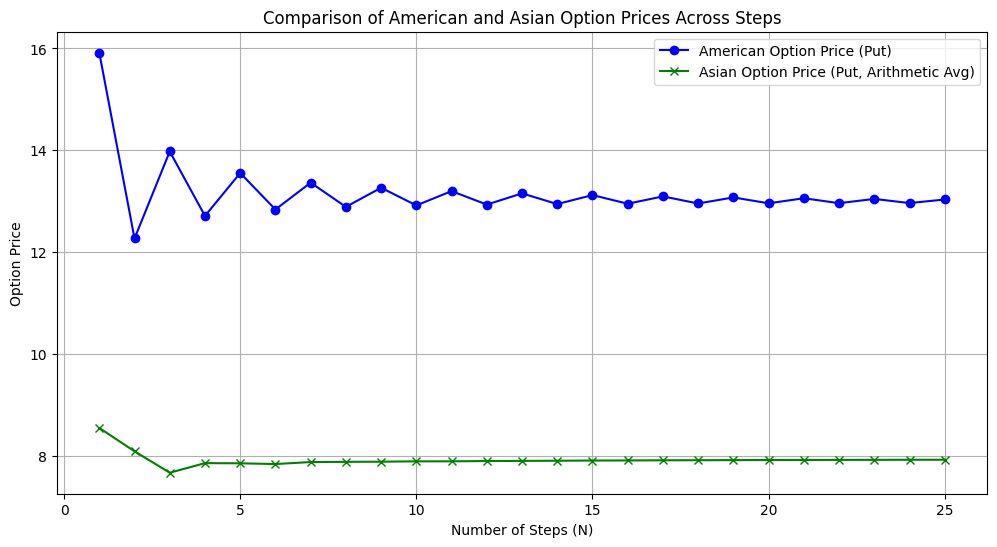

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define function for American option price using Binomial model
def american_option_vol(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r * dt) - d) / (u - d)
    C = np.zeros([N + 1, N + 1])
    S = np.zeros([N + 1, N + 1])

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** i) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** i) * (d ** (j - i))
            if opttype == "C":
                C[j, i] = max(C[j, i], S[j, i] - K)
            else:
                C[j, i] = max(C[j, i], K - S[j, i])

    return C[0, 0]

# Define function for Asian option price using Binomial model with averaging
def BTM(strike_type, option_type, S0, K, r, sigma, T, N):
    deltaT = T / N
    u = np.exp(sigma * np.sqrt(deltaT))
    d = 1 / u
    proba = (np.exp(r * deltaT) - d) / (u - d)
    St = [S0]
    At = [S0]
    strike = [K]
    for i in range(N):
        St = [j * u for j in St] + [j * d for j in St]
        At += At
        strike += strike
        for x in range(len(At)):
            At[x] += St[x]
    At = np.array(At) / (N + 1)
    if strike_type == "fixed":
        if option_type == "C":
            payoff = np.maximum(At - np.array(strike), 0)
        else:
            payoff = np.maximum(np.array(strike) - At, 0)
    else:
        if option_type == "C":
            payoff = np.maximum(np.array(St) - At, 0)
        else:
            payoff = np.maximum(At - np.array(St), 0)
    option_price = payoff
    for i in range(N):
        length = len(option_price) // 2
        option_price = proba * option_price[:length] + (1 - proba) * option_price[length:]

    return option_price[0]

# Parameters
S0 = 180            # Initial stock price
K = 182             # Strike price
r = 0.02            # Risk-free interest rate
sigma = 0.25        # Volatility
T = 0.5             # Time to maturity (0.5 years)

# Arrays to store option prices for different N values
N_values = range(1, 26)
american_option_prices = []
asian_option_prices = []

# Calculate American and Asian option prices for each N
for N in N_values:
    american_price = american_option_vol(S0, K, T, r, sigma, N, "P")
    asian_price = BTM(strike_type="fixed", option_type="P", S0=S0, K=K, r=r, sigma=sigma, T=T, N=N)
    american_option_prices.append(american_price)
    asian_option_prices.append(asian_price)
    print(f"N={N}: American Put Price = {american_price:.4f}, Asian Put Price = {asian_price:.4f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(N_values, american_option_prices, label="American Option Price (Put)", marker='o', color='b')
plt.plot(N_values, asian_option_prices, label="Asian Option Price (Put, Arithmetic Avg)", marker='x', color='g')
plt.xlabel("Number of Steps (N)")
plt.ylabel("Option Price")
plt.title("Comparison of American and Asian Option Prices Across Steps")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from collections import defaultdict

def asian_option_metrics(strike_type, option_type, S0, K, r, sigma, T, N):
    deltaT = T / N
    u = np.exp(sigma * np.sqrt(deltaT))
    d = 1 / u
    proba = (np.exp(r * deltaT) - d) / (u - d)
    discount = np.exp(-r * deltaT)

    nodes = defaultdict(list)
    nodes[0] = [(S0, S0, 1)]  # (stock_price, running_avg, path_count)

    for step in range(N):
        for S, avg, count in nodes[step]:
            Su = S * u
            avg_u = (avg * count + Su) / (count + 1)
            nodes[step + 1].append((Su, avg_u, count + 1))

            Sd = S * d
            avg_d = (avg * count + Sd) / (count + 1)
            nodes[step + 1].append((Sd, avg_d, count + 1))

    option_values = defaultdict(list)
    deltas = defaultdict(list)
    cash_account = defaultdict(list)

    for S, avg, _ in nodes[N]:
        if option_type == "P":
            option_values[N].append(max(K - avg, 0))
        else:
            option_values[N].append(max(avg - K, 0))

    for step in range(N-1, -1, -1):
        for i, (S, avg, count) in enumerate(nodes[step]):
            Su, avg_u, _ = nodes[step + 1][2*i]
            Sd, avg_d, _ = nodes[step + 1][2*i + 1]

            option_up = option_values[step + 1][2*i]
            option_down = option_values[step + 1][2*i + 1]

            delta = (option_up - option_down) / (Su - Sd)
            deltas[step].append(delta)

            option_value = discount * (proba * option_up + (1 - proba) * option_down)
            option_values[step].append(option_value)

            cash = option_value - delta * S
            cash_account[step].append(cash)

    return {
        'nodes': nodes,
        'deltas': deltas,
        'cash_account': cash_account,
        'option_values': option_values
    }

results = asian_option_metrics("fixed", "P", 180, 182, 0.02, 0.25, 0.5, 23)

print("\nDelta Hedging Analysis (Central Path):")
print("Step |   Stock Price   |   Average   |     Delta    |    Cash Account")
print("-" * 70)

for step in range(23):  # Show first 10 steps
    # Take middle path node
    mid_index = len(results['nodes'][step]) // 2
    S, avg, _ = results['nodes'][step][mid_index]
    delta = results['deltas'][step][mid_index]
    cash = results['cash_account'][step][mid_index]
    print(f"{step:4d} | {S:14.2f} | {avg:10.2f} | {delta:11.4f} | {cash:14.2f}")

print("\nPath Analysis (Up Movement Path):")
print("Step |   Stock Price   |   Average   |     Delta    |    Cash Account")
print("-" * 70)

path_index = 0
for step in range(23):
    S, avg, _ = results['nodes'][step][path_index]
    delta = results['deltas'][step][path_index]
    cash = results['cash_account'][step][path_index]
    print(f"{step:4d} | {S:14.2f} | {avg:10.2f} | {delta:11.4f} | {cash:14.2f}")
    path_index = path_index * 2  # Follow up movement


Delta Hedging Analysis (Central Path):
Step |   Stock Price   |   Average   |     Delta    |    Cash Account
----------------------------------------------------------------------
   0 |         180.00 |     180.00 |     -0.4850 |          95.14
   1 |         173.49 |     176.74 |     -0.6019 |         115.47
   2 |         180.00 |     177.83 |     -0.4560 |          89.25
   3 |         186.76 |     180.06 |     -0.3072 |          61.50
   4 |         193.77 |     182.80 |     -0.1741 |          35.74
   5 |         201.05 |     185.84 |     -0.0759 |          16.02
   6 |         208.60 |     189.09 |     -0.0217 |           4.72
   7 |         216.43 |     192.51 |     -0.0029 |           0.65
   8 |         224.55 |     196.07 |     -0.0000 |           0.01
   9 |         232.99 |     199.76 |      0.0000 |           0.00
  10 |         241.73 |     203.58 |      0.0000 |           0.00
  11 |         250.81 |     207.51 |      0.0000 |           0.00
  12 |         260.23 |    